In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Fraud_check.csv")

In [4]:
data = df.copy()

In [5]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
#Label encoding for categorical data
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform (data['Undergrad'])
data['Marital.Status'] =label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])

In [7]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [8]:
#Categorising data based on Taxable income
tax =[]
for value in data['Taxable.Income'] :
  if value <=30000:
    tax.append('Risky')
  else :
      tax.append('Good')
data['tax_value']= tax

In [11]:
data2 = data.drop(['Taxable.Income'],axis=1)

<AxesSubplot:>

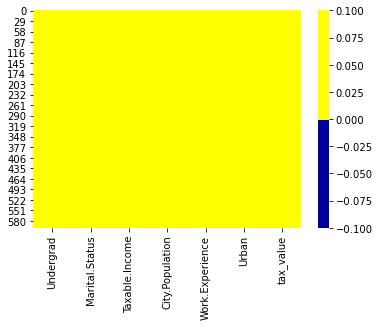

In [12]:
import seaborn as sns
cols = data.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [18]:
# Data visualization usiing sweetviz and pandas profiling

In [19]:
import pandas_profiling as pp
import sweetviz as sv

In [20]:
EDA_report= pp.ProfileReport(data)

In [21]:
EDA_report.to_file(output_file='fraud_check_EDA_report.html')

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
sweet_report = sv.analyze(data)
sweet_report.show_html('fraud_check_EDA_report2.html')

                                             |                                             | [  0%]   00:00 ->…

Report fraud_check_EDA_report2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [23]:
# creating x and y datasets

In [24]:
array =  data2.values
x = array[:,0:5]
y= array[:,5:]

In [25]:
x

array([[0, 2, 50047, 10, 1],
       [1, 0, 134075, 18, 1],
       [0, 1, 160205, 30, 1],
       ...,
       [0, 0, 154058, 0, 1],
       [1, 1, 180083, 17, 0],
       [0, 0, 158137, 16, 0]], dtype=object)

In [26]:
y

array([['Good'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Risky'],
       ['Good'],
       ['Risky'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Risky'],
       ['Good'],
       ['Good'],
       ['Risky'],
       ['Good'],
       ['Risky'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Risky'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Risky'],
       ['Good'],
       ['Risky'],
       ['Good'],
       ['Risky'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Risky'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Good'],
       ['Risky'],
       ['Good'],
       ['Risky'],
       ['Good'],
       ['Good'],
  

In [27]:
kfold = KFold( n_splits=6, random_state=None)

 Model 1 using Random Forest

In [28]:
model= RandomForestClassifier(n_estimators=100,max_features=3)
results= cross_val_score(model, x, y.ravel(), cv=kfold)    
print(results.mean())

0.7483333333333334


Model 2 using Esemble Methods

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [30]:
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

In [31]:
ensemble = VotingClassifier(estimators)
results2 = cross_val_score(ensemble, x, y, cv=kfold)
print(results2.mean())

0.7933333333333333


In [32]:
# accuracy is 79%

In [33]:
# Here, esemble methods is giving more accuracy than Random Forest